In [1]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import fbeta_score, make_scorer
import seaborn as sns 
from sklearn.utils.class_weight import compute_class_weight 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from collections import Counter 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(14)
data = pd.read_csv("C://Users/guddu/HeartFailureEDAandPrediction/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data[data.columns[data.isna().sum() > 0]].isna().mean()*100

Series([], dtype: float64)

In [4]:
x = data.drop('HeartDisease', axis= 1)
y = data['HeartDisease']

In [5]:
x.shape

(918, 11)

In [6]:
x_en = pd.get_dummies(x, drop_first = True)
x_en

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [7]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_en.to_numpy())
mask = yhat!= -1
x_train = x_en.to_numpy()[mask, :]
x_train = pd.DataFrame(x_train, columns = x_en.columns)
y_train =y[mask]
print(x_train.shape, y_train.shape)

(896, 15) (896,)


In [8]:
mm_scaler = MinMaxScaler()
x_train = pd.DataFrame(mm_scaler.fit_transform(x_train), columns = x_train.columns)
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.433962,0.693046,0.0,0.784173,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.622642,0.431655,0.0,0.669065,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.339623,0.678657,0.0,0.251799,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.415094,0.513189,0.0,0.323741,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.528302,0.467626,0.0,0.424460,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.346939,0.150943,0.633094,0.0,0.496403,0.431818,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
892,0.816327,0.471698,0.462830,1.0,0.561151,0.681818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
893,0.591837,0.339623,0.314149,0.0,0.374101,0.431818,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
894,0.591837,0.339623,0.565947,0.0,0.798561,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
model_featureImportance = ExtraTreesClassifier()
model_featureImportance.fit(x_train, y_train)
print(model_featureImportance.feature_importances_)

[0.07161057 0.06344405 0.09409469 0.03952773 0.08061087 0.07946389
 0.04670558 0.06226962 0.03842728 0.01299392 0.0218114  0.01492283
 0.08973922 0.09866373 0.1857146 ]


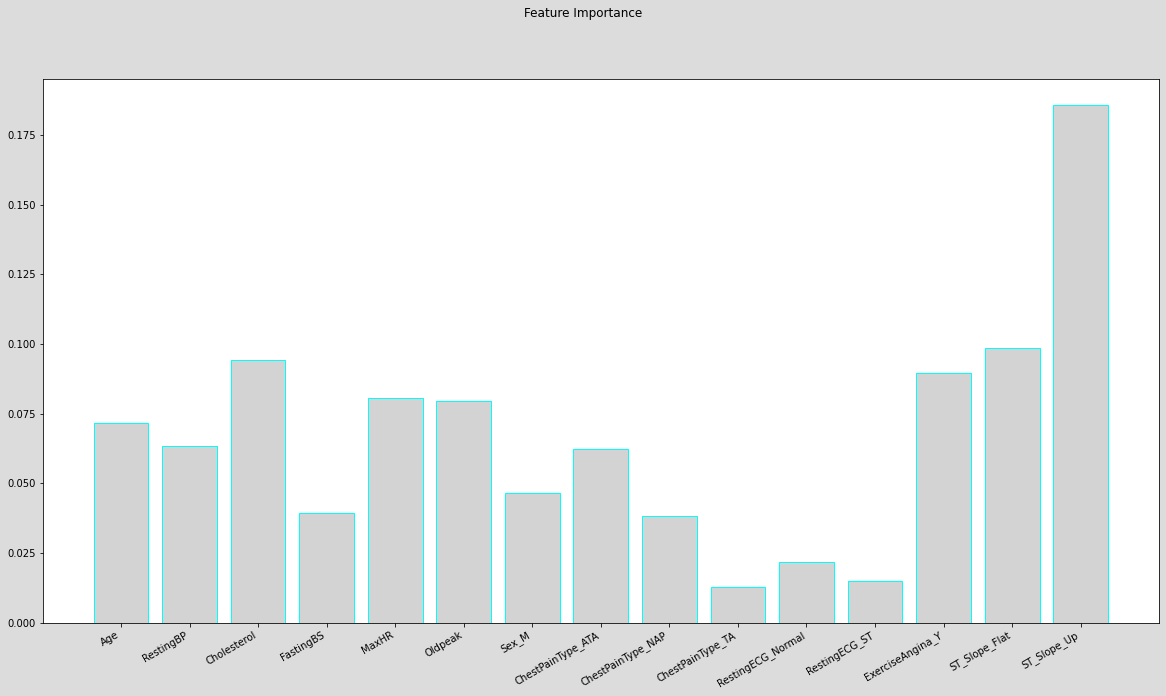

In [10]:
score = model_featureImportance.feature_importances_
name = x_train.columns 
fig = plt.figure(figsize = (20,10), facecolor = 'gainsboro')
fig.suptitle('Feature Importance')
ax = fig.add_subplot(111)
plt.bar(x = name, height = score, color = 'lightgrey', edgecolor = 'cyan')
plt.xticks(rotation = 30, ha = 'right')
plt.show()

In [11]:
feature_selected = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Cholesterol', 'MaxHR', 'Oldpeak', 
                    'Age', 'RestingBP', 'ChestPainType_ATA']
x2 = x_train[feature_selected]
x2

,ST_Slope_Up,ST_Slope_Flat,ExerciseAngina_Y,Cholesterol,MaxHR,Oldpeak,Age,RestingBP,ChestPainType_ATA
0,1.0,0.0,0.0,0.693046,0.784173,0.295455,0.244898,0.433962,1.0
1,0.0,1.0,0.0,0.431655,0.669065,0.409091,0.428571,0.622642,0.0
2,1.0,0.0,0.0,0.678657,0.251799,0.295455,0.183673,0.339623,1.0
3,0.0,1.0,1.0,0.513189,0.323741,0.465909,0.408163,0.415094,0.0
4,1.0,0.0,0.0,0.467626,0.424460,0.295455,0.530612,0.528302,0.0
...,...,...,...,...,...,...,...,...,...
891,0.0,1.0,0.0,0.633094,0.496403,0.431818,0.346939,0.150943,0.0
892,0.0,1.0,0.0,0.462830,0.561151,0.681818,0.816327,0.471698,0.0
893,0.0,1.0,1.0,0.314149,0.374101,0.431818,0.591837,0.339623,0.0
894,0.0,1.0,0.0,0.565947,0.798561,0.295455,0.591837,0.339623,1.0


In [12]:
f2_scorer = make_scorer(fbeta_score, beta = 2)
f2_scorer

make_scorer(fbeta_score, beta=2)

In [13]:
scoring = f2_scorer

In [14]:
kfold = StratifiedKFold(n_splits = 10, random_state = 14, shuffle = True)

<AxesSubplot:ylabel='count'>

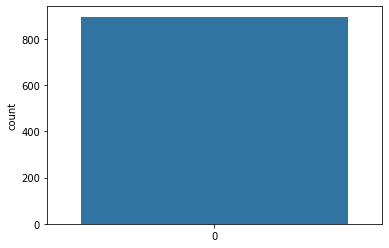

In [15]:
sns.countplot(y_train)

In [16]:
from sklearn.utils.class_weight import compute_class_weight
weighting = compute_class_weight(class_weight ='balanced', classes, [0,1], y_train)
print(weighting)

SyntaxError: positional argument follows keyword argument (<ipython-input-16-0e9a1bbfce7d>, line 2)

In [17]:
def grid_model(x, y , model , param):
    grid=GridSearchCV(estimator=model, param_grid=param, scoring=scoring, cv=kfold, n_jobs=-1)
    grid.fit(x, y)
    print("Best Score: %f use parameters: %s" % (grid.best_score_, grid.best_params_))

In [18]:
def cross_validation(x, y, model):
    result= cross_val_score(model, x, y, cv=kfold, scoring=scoring, n_jobs=-1)
    print("Score: %f" % result.mean())

In [19]:
model_lg= LogisticRegression(class_weight=weighting, solver='newton-cg')
cross_validation(x_train, y_train, model_lg)
cross_validation(x2, y_train, model_lg)

NameError: name 'weighting' is not defined

In [20]:
param_ld=dict(solver=['svd', 'lsqr', 'eigen'])
model_ld=LinearDiscriminantAnalysis()
grid_model(x_train, y_train, model_ld, param_ld)
grid_model(x2, y_train, model_ld, param_ld)

Best Score: 0.885365 use parameters: {'solver': 'svd'}
Best Score: 0.858508 use parameters: {'solver': 'svd'}


In [21]:
param_knn=dict(n_neighbors=range(2,15,1),
              weights=['uniform', 'distance'],
              algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])
model_knn=KNeighborsClassifier()
grid_model(x_train, y_train, model_knn, param_knn)
grid_model(x2, y_train, model_knn, param_knn)

Best Score: 0.895441 use parameters: {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}
Best Score: 0.874887 use parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [22]:
model_nb=GaussianNB()
cross_validation(x_train, y_train, model_nb)
cross_validation(x2, y_train, model_nb)

Score: 0.879165
Score: 0.871353


In [23]:
model_cart=DecisionTreeClassifier(class_weight='balanced')
param_cart=dict(max_depth=range(2,10,1))
grid_model(x_train, y_train, model_cart, param_cart)
grid_model(x2, y_train, model_cart, param_cart)

Best Score: 0.868125 use parameters: {'max_depth': 3}
Best Score: 0.877679 use parameters: {'max_depth': 3}


In [24]:
model_svc=SVC(kernel='linear', class_weight='balanced', C=3, gamma=0.1)
cross_validation(x_train, y_train, model_svc)
cross_validation(x2, y_train, model_svc)

Score: 0.884190
Score: 0.843368


In [25]:
counter = Counter(y_train)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 0.817


In [26]:
model_xgb=XGBClassifier(n_estimators=63, scale_pos_weight=estimate, learning_rate=0.05, subsample=0.2)
cross_validation(x_train, y_train, model_xgb)
cross_validation(x2, y_train, model_xgb)

Score: 0.900218
Score: 0.886506


In [27]:
model_svc_calibrated=SVC(kernel='linear', class_weight='balanced', C=3, gamma=0.1)
calibrated = CalibratedClassifierCV(model_svc_calibrated, method='isotonic', cv=3)
cross_validation(x_train, y_train, calibrated)
cross_validation(x2, y_train, calibrated)

Score: 0.890263
Score: 0.886738


In [28]:
model_cart_calibrated=DecisionTreeClassifier(class_weight='balanced', max_depth=3)
calibrated_cart= CalibratedClassifierCV(model_cart_calibrated, method='sigmoid', cv=3)
cross_validation(x_train, y_train, calibrated_cart)
cross_validation(x2, y_train, calibrated_cart)

Score: 0.873926
Score: 0.879329


In [29]:
param_bagging=dict(n_estimators=range(10,100,10))
model_bagging=BaggingClassifier()
grid_model(x_train, y_train, model_bagging, param_bagging)
grid_model(x2, y_train, model_bagging, param_bagging)

Best Score: 0.874455 use parameters: {'n_estimators': 70}
Best Score: 0.858862 use parameters: {'n_estimators': 80}


In [30]:
param_balance=dict(n_estimators=range(10,100,10))
model_balance=BalancedBaggingClassifier()
grid_model(x_train, y_train, model_balance, param_balance)
grid_model(x2, y_train, model_balance, param_balance)

Best Score: 0.872374 use parameters: {'n_estimators': 80}
Best Score: 0.851096 use parameters: {'n_estimators': 80}


In [31]:
param_randomforest=dict(n_estimators=range(10,100,10))
model_randomforest=RandomForestClassifier(class_weight='balanced_subsample')
grid_model(x_train, y_train, model_randomforest, param_randomforest)
grid_model(x2, y_train, model_randomforest, param_randomforest)

Best Score: 0.899389 use parameters: {'n_estimators': 70}
Best Score: 0.876473 use parameters: {'n_estimators': 90}


In [32]:
param_easyensemble=dict(n_estimators=range(2,15,1))
model_easyensemble=EasyEnsembleClassifier()
grid_model(x_train, y_train, model_easyensemble, param_easyensemble)
grid_model(x2, y_train, model_easyensemble, param_easyensemble)

Best Score: 0.869078 use parameters: {'n_estimators': 2}
Best Score: 0.847087 use parameters: {'n_estimators': 5}


In [33]:
xtrain, xtest, ytrain, ytest=train_test_split(x_train, y_train, test_size=0.2, random_state=124)

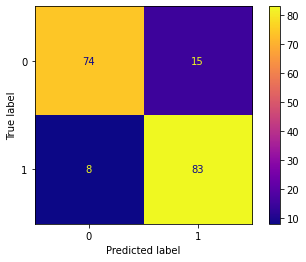

In [34]:
final_randomforest=RandomForestClassifier(n_estimators=30, class_weight='balanced_subsample')
final_randomforest.fit(xtrain, ytrain)
plot_confusion_matrix(final_randomforest, xtest, ytest, cmap=plt.cm.plasma)

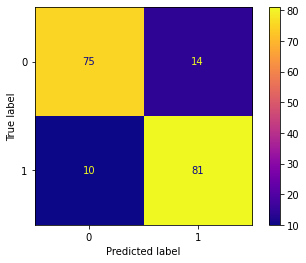

In [35]:
final_xgb=XGBClassifier(n_estimators=63, scale_pos_weight=estimate, learning_rate=0.05, subsample=0.2)
final_xgb.fit(xtrain, ytrain)
plot_confusion_matrix(final_xgb, xtest, ytest, cmap=plt.cm.plasma)